<a href="https://colab.research.google.com/github/jashvidesai/ORF-Thesis/blob/main/RadiopharmaceuticalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas contextily shapely pyproj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 15.2 MB/s eta 0:00:00


In [2]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import itertools

import geopandas as gpd
import contextily as cx
from shapely.geometry import Point

In [3]:
hospitals = {
    "Michigan Diagnostics Center": (42.48853947067958, -83.10526194019599),
    "Nuclear Medicine PET Scan at University Hospital": (42.373423665779875, -83.74705677218591),
    "Regional Medical Imaging Southgate": (42.25969201846909, -83.17027457939628),
    "Beaumont PET/CT St. Clair Shores": (42.56791387603854, -82.8846300648719),
    "Regional Medical Imaging Novi": (42.49902362908627, -83.42865686601002),
    "Henry Ford Radiology and Imaging - Macomb Hospital": (42.64671830391097, -82.96015224192095),
    "Computed Tomography (CT/CAT scan) at Livonia Center for Specialty Care": (42.452871313282124, -83.43988814124502),
    "Computed Tomography (CAT/CT scan) at East Ann Arbor Health and Geriatrics Center": (42.34030658958308, -83.677349389071),
    "Synergy MRI: Royal Oak - Pure Open MRI": (42.50612096423798, -83.14466604935329),
    "Michigan Resonance Imaging": (42.6915481520167, -83.23932965490553),
    "Computed Tomography (CAT/CT scan) at Canton Health Center": (42.35216501570914, -83.48962664585721),
    "Therma-Scan of Michigan, LLC": (42.53450224783935, -83.28906815951773),
    "Life Scan Imaging Corporation": (42.55223400342188, -83.01309968231458),
    "Scan Clear MRI": (42.639636951333856, -82.96175670981167),
    "Precise MRI of Michigan": (42.51321749370651, -83.22007604021694),
    "McLaren Clarkston - Diagnostic Imaging": (42.749307331742, -83.38212729717925),
    "Corewell Health William Beaumont University Hospital Imaging Center - 3581 W 13 Mile Rd": (42.53686677288904, -83.19761348974691),
    "Corewell Health Farmington Hills Hospital Cancer PET - 27900 Grand River Ave": (42.46115756857247, -83.32917985678563),
    "Michigan Diagnostics": (42.56405237592633, -83.18156881083976),
    "University of Michigan Department of Radiology": (42.31065073827846, -83.7367147010275),
    "Magnetic Resonance Imaging (MRI) at University Hospital": (42.31302372082438, -83.74313257259035),
    "University of Michigan Radiology Department": (42.3308182381527, -83.66451364594526),
    "Henry Ford Radiology and Imaging - Henry Ford Hospital": (42.39483682739532, -83.09332307685038),
    "Cat Scan Center-Clarkston": (42.75048553064453, -83.42223899444716),
    "Karmanos Cancer Institute": (42.37587515709506, -83.0548158474732),
    "Corewell Health William Beaumont University Hospital Imaging Center (North) - 3601 West 13 Mile Rd": (42.54750602768598, -83.18798668240262),
    "University of Michigan Hospital": (42.3082776662676, -83.73029682946462),
    "West Ann Arbor Health Center": (42.30617469480637, -83.81869373445174),
    "Corewell Health Farmington Hills Hospital": (42.492773027416945, -83.32430899777493),
    "U of M nuclear medicine": (42.30567431128067, -83.73610211287075),
    "Xoran Technologies, LLC.": (42.2347479291253, -83.74979481977397),
    "H C S Group": (42.38891163244826, -83.47602561421753),
    "Brighton Center for Specialty Care": (42.5569552581989, -83.78832668728445),
    "Barbara Ann Karmanos Cancer Institute - Lawrence and Idell Weisberg Cancer Treatment Center": (42.53715336348327, -83.34675344872672),
    "Henry Ford Cancer - Detroit": (42.38923356016813, -83.08820419968758),
    "Bionicc Body Screening": (42.50779307035835, -83.26398543939487),
    "Medical Scan Inc": (42.60591583149083, -83.15000229177215),
    "Henry Ford Medical Center - Sterling Heights": (42.57052850357885, -83.07172470846498),
    "Corewell Health Dearborn Hospital": (42.31616234192726, -83.20218734731026),
    "University of Michigan Medical Center": (42.30302607557066, -83.73009342374314),
    "Henry Ford Hospital": (42.39578802444869, -83.07850907813186),
    "Children's Hospital of Michigan": (42.37245750030311, -83.0524165503628),
    "DMC Detroit Receiving Hospital": (42.371442933019594, -83.0524165503628),
    "McLaren Clarkston": (42.75377544900855, -83.36983337813187),
    "Huron Gastro Ann Arbor": (42.28356418243363, -83.6595742965488),
}

depot = {
    "EHMET health": (42.42980168639475, -83.52695942935674)
}

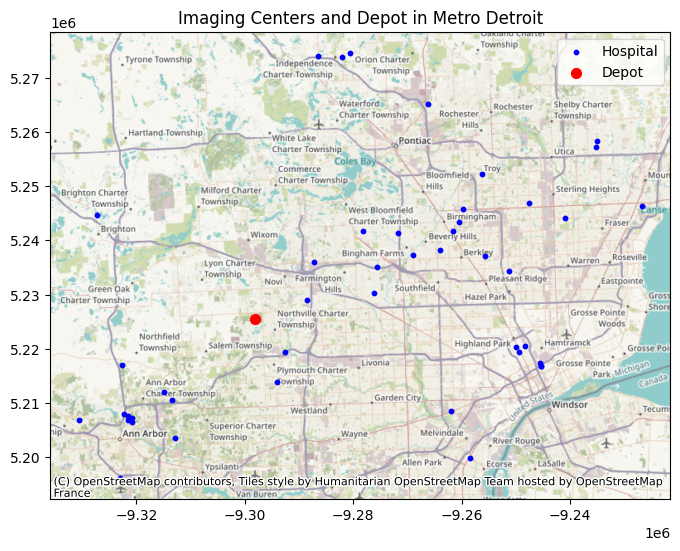

In [4]:
# 1. Build GeoDataFrames
hospital_points = []
for name, (lat, lon) in hospitals.items():
    # Note: geometry expects (longitude, latitude)
    hospital_points.append([name, Point(lon, lat)])

hospitals_gdf = gpd.GeoDataFrame(
    hospital_points,
    columns=["Name", "geometry"],
    crs="EPSG:4326"
)

depot_points = []
for name, (lat, lon) in depot.items():
    depot_points.append([name, Point(lon, lat)])

depot_gdf = gpd.GeoDataFrame(
    depot_points,
    columns=["Name", "geometry"],
    crs="EPSG:4326"
)

# 2. Reproject to Web Mercator
hospitals_3857 = hospitals_gdf.to_crs(epsg=3857)
depot_3857 = depot_gdf.to_crs(epsg=3857)

# 3. Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot hospitals in blue
hospitals_3857.plot(
    ax=ax,
    color='blue',
    markersize=10,
    label='Hospital'
)

# Plot depot in red
depot_3857.plot(
    ax=ax,
    color='red',
    markersize=50,
    label='Depot'
)

# Add a basemap behind it
cx.add_basemap(ax, crs=hospitals_3857.crs)

ax.legend()
plt.title("Imaging Centers and Depot in Metro Detroit")
plt.show()